<a href="https://colab.research.google.com/github/cyrus-rule/Data-Science-/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-ukwp7spv
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-ukwp7spv
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=8a3eaa856dd39074c5fc3b7495697570b45a478b51a79e536a9cfcab4b89445c
  Stored in directory: /tmp/pip-ephem-wheel-cache-4a34qruj/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.4 MB/s eta 0:00:00
   ━

In [5]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomials help you identify non-linear trands in your data. If the relationship between a predictor and the outcome isn't linear, polynomial terms allow the model to bend and follow the true trend of the data more closely. For example, the relationship between hour of the day and bikes rented is not linear ( midday hours see more bikes rented than early or late ones) so a polynomial terms makes sense.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Too many or too high degree polynomial terms run the risk of overfitting the data. If this happens, the model will do a poor job of extrapolating to data besides that it was tested on. Also , if the real relationship between prdictor and data is linear, unnecessarily adding higher degree polynomial terms will just increase the model's complexity for no reason.

**Task3**:

What's the point of using b splines?

B splines are a versatile and controlled way to model nonlinear relationships. By breaking the data into several piecewise components, they can capture complex curves with as much chaos as high degree polynomials. They are also easier to interpret because the functions between each knot are simpler.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process essentially says that every point has some amount of influence on the other points based on our prior assumptions about the data. We capture this with the kernel, which gives us a definition of similarity between points and tells us which points should be very related. When a GP tries to predict a new point, it uses the similarity between that point and the others to make the prediction. Also, GPs don't give just one prediction, they give a distribution of functions that could represent the data.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

In [7]:
data

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [14]:
num_knots = 6
knots = np.linspace(50, 180, num_knots+2)[1:-1]
model_spline = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", data, family="negativebinomial")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


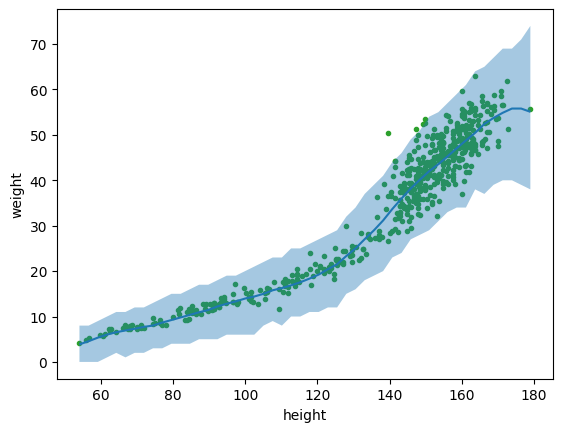

In [15]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps= True)
plt.plot(data.height, data.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned about how to model x uncertainty. This way of accounting for the fact that we weren't totally sure about the horizontal location of inputs was interesting to me. I also didn't realize how much we had to specify about our data for the GP to work properly (like the part where we had to specify that the mean of our data was not 0)

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

![image.png](
  
)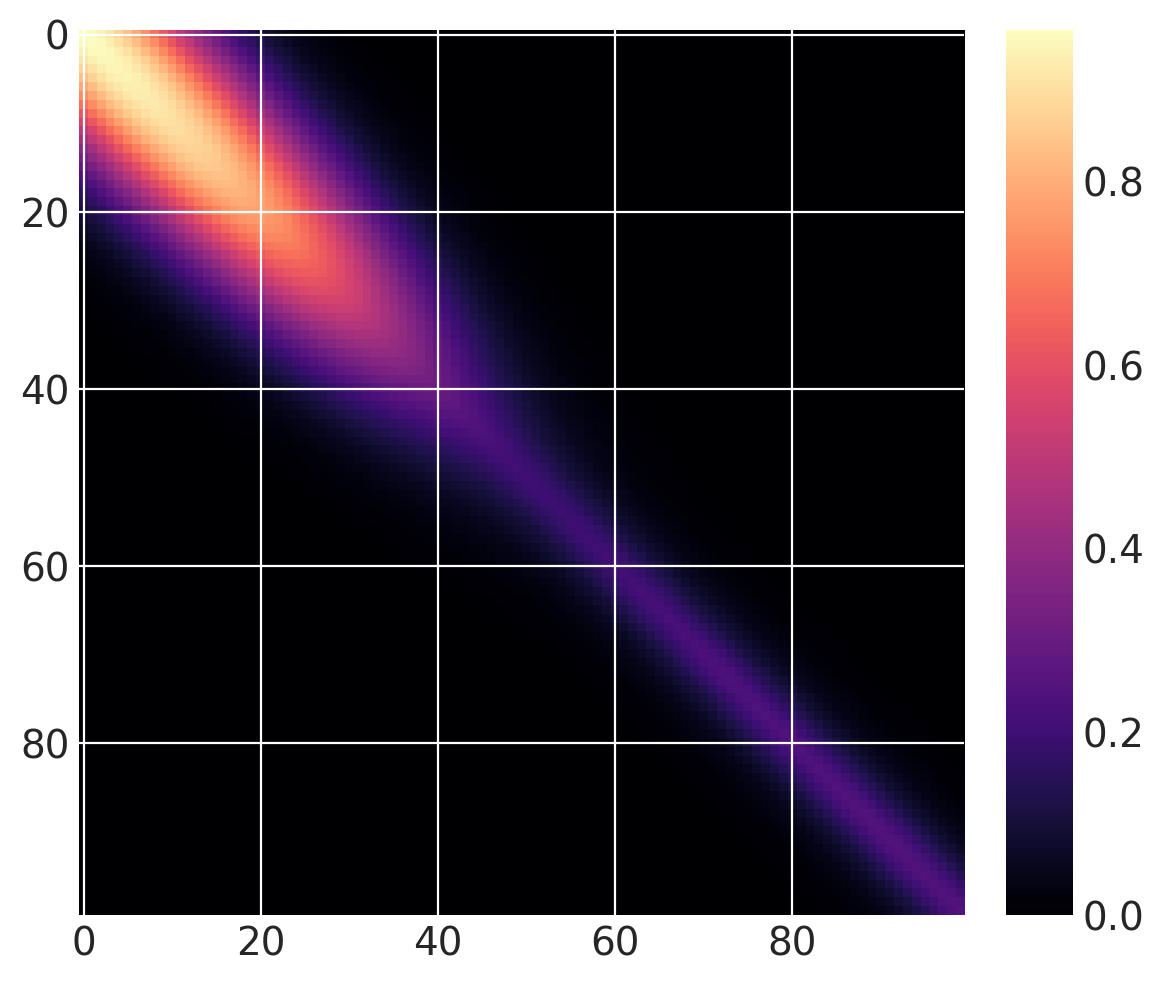

This graph is my favorite because its a very good representation of the gradual change between the two covariance functions, and then that is represented in the gradual change from smooth to bumpy in the gaussian process samples.